## Tathagat Bhattacharyya

# FoodHub Project

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [3]:
# read in the data file
df = pd.read_csv(r'C:\Users\Tathagat\Documents\MIT IDSS\FoodHub Project\foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: order_id, customer_id, food_preparation_time, and delivery_time have int64 datatypes. restaurant_name, cuisine_type, day_of_the_week, and rating have object datatypes. cost_of_the_order has float64 datatype.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: According to the output, the minimum food preparation time is 20 minutes, the maximum time is 35 minutes, and the average time is 27.37 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations: There are 736 order that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

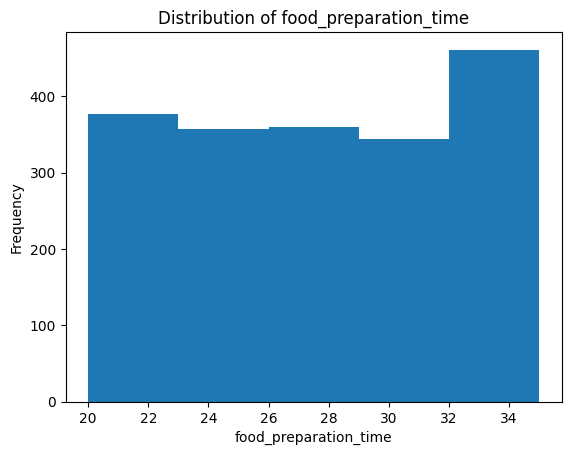

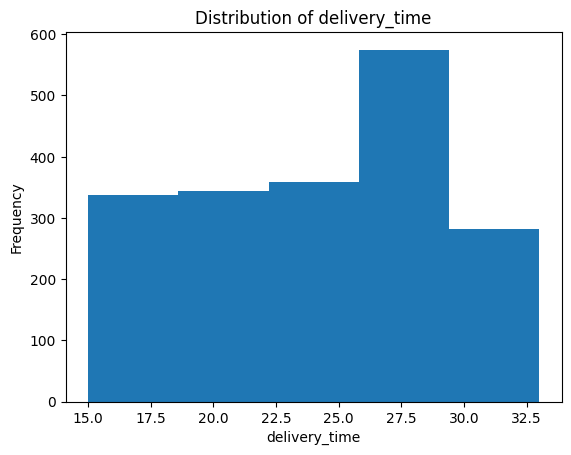

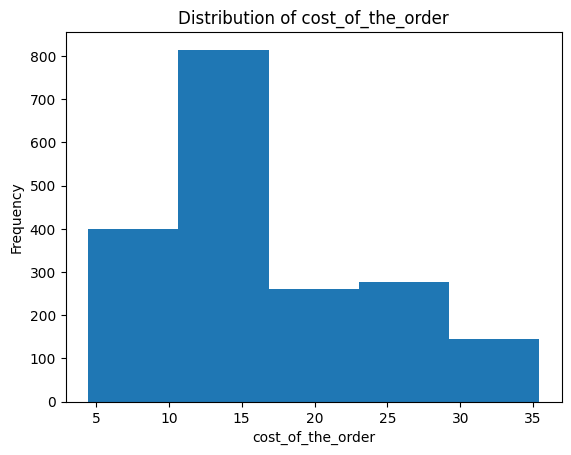

In [9]:
# Write the code here
# I can use histograms for some numerical variables to check their distribution
plt.hist(df['food_preparation_time'],bins=5)
plt.title('Distribution of food_preparation_time')
plt.xlabel('food_preparation_time')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['delivery_time'],bins=5)
plt.title('Distribution of delivery_time')
plt.xlabel('delivery_time')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['cost_of_the_order'],bins=5)
plt.title('Distribution of cost_of_the_order')
plt.xlabel('cost_of_the_order')
plt.ylabel('Frequency')
plt.show()

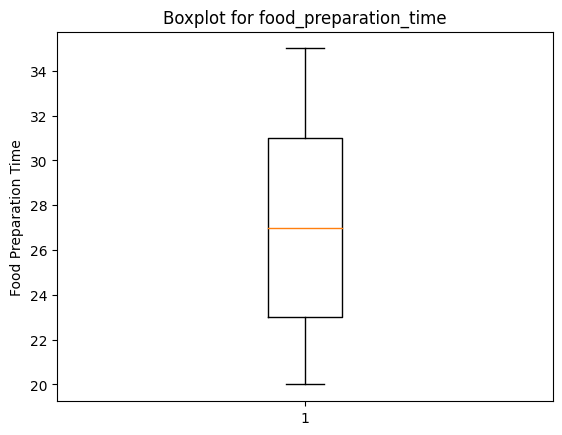

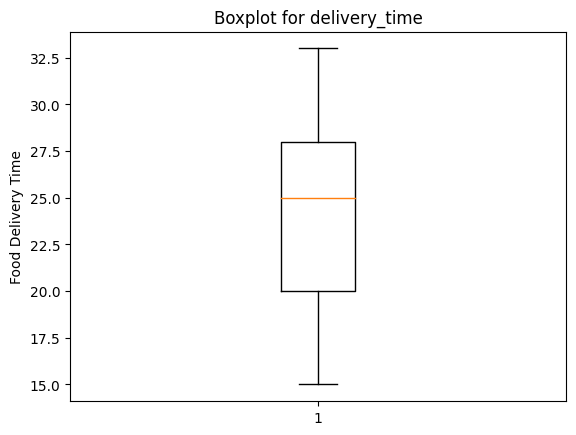

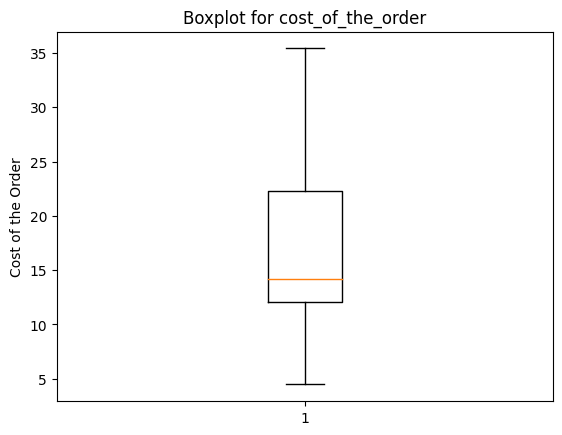

In [10]:
# I can use box plots for some numerical variables to see if they have any outliers
plt.boxplot(df['food_preparation_time'])
plt.title('Boxplot for food_preparation_time')
plt.ylabel('Food Preparation Time')
plt.show()

plt.boxplot(df['delivery_time'])
plt.title('Boxplot for delivery_time')
plt.ylabel('Food Delivery Time')
plt.show()

plt.boxplot(df['cost_of_the_order'])
plt.title('Boxplot for cost_of_the_order')
plt.ylabel('Cost of the Order')
plt.show()

In [11]:
df['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

In [12]:
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [13]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

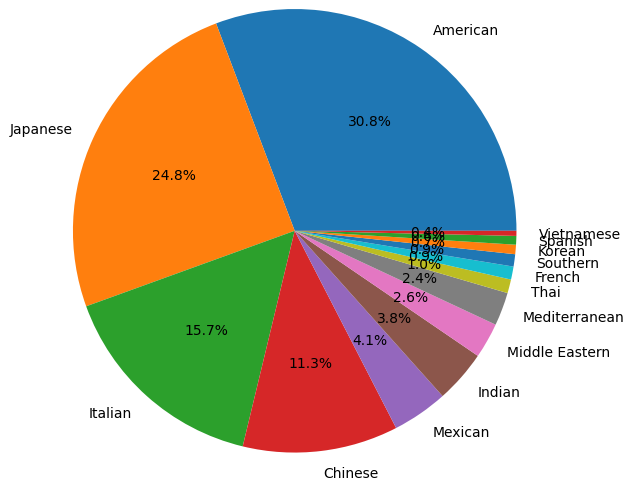

In [14]:
# I can use piecharts to visualize some categorical variables
# Piechart of cuisine type
plt.pie(df.cuisine_type.value_counts(), autopct='%.1f%%', radius=1.5, labels=['American','Japanese','Italian','Chinese','Mexican','Indian','Middle Eastern','Mediterranean','Thai','French','Southern','Korean','Spanish','Vietnamese'])
plt.show()

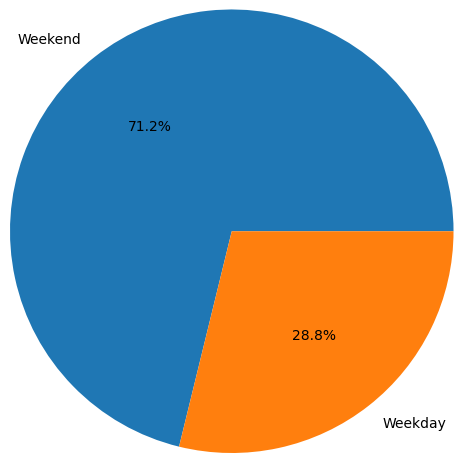

In [15]:
# Piechart of day of the week
plt.pie(df.day_of_the_week.value_counts(), autopct='%.1f%%', radius=1.5, labels=['Weekend','Weekday'])
plt.show()

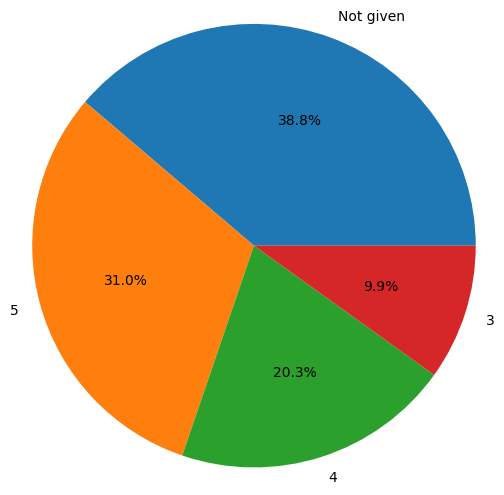

In [16]:
# Piechart of rating
plt.pie(df.rating.value_counts(), autopct='%.1f%%', radius=1.5, labels=['Not given','5','4','3'])
plt.show()

#### Obersvations: For the output shown above, it can be seen that food_preparation_time, delivery_time, and cost_of_the_order do not have approximate normal distributions. The box plots indicate that these three variables do not have any outliers. The piecharts reveal a few facts from this dataset. The most common cuisine type ordered was American food followed by Japanese food. The majority of the orders were on weekends. More than half of the orders had either no rating or a rating of 5.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# Write the code here
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations: The top 5 restuarants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

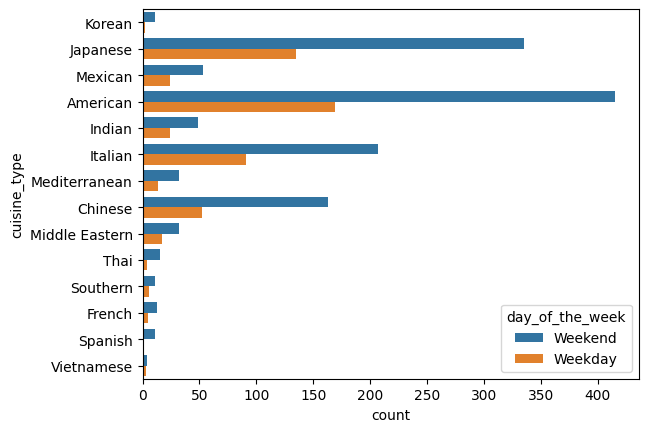

In [18]:
# Write the code here
sns.countplot(data=df, y='cuisine_type', hue='day_of_the_week')
plt.show()

#### Observations: According to the plot above, the most popular cuisine on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [19]:
# Write the code here
above_20 = df[df['cost_of_the_order']>20]
above_20.shape

(555, 9)

In [20]:
# Now I can calculate the percentage
(555/1898)*100

29.24130663856691

#### Observations: 29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [21]:
# Write the code here
df.delivery_time.describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [22]:
# Write the code here
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations: The top 3 most frequent customers have ID numbers 52832, 47440, and 83287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


In [23]:
# Write the code here
# First, I will begin with a correlation matrix for the numerical variables
df2 = df.drop(['restaurant_name','cuisine_type','day_of_the_week','rating'],axis=1)
cm = df2.corr()
cm

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


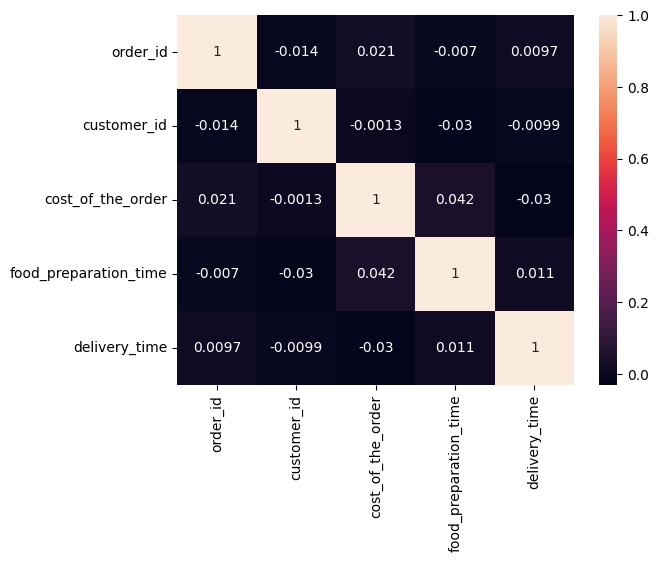

In [24]:
# I can represent this result as a heatmap
sns.heatmap(cm,annot=True)
plt.show()

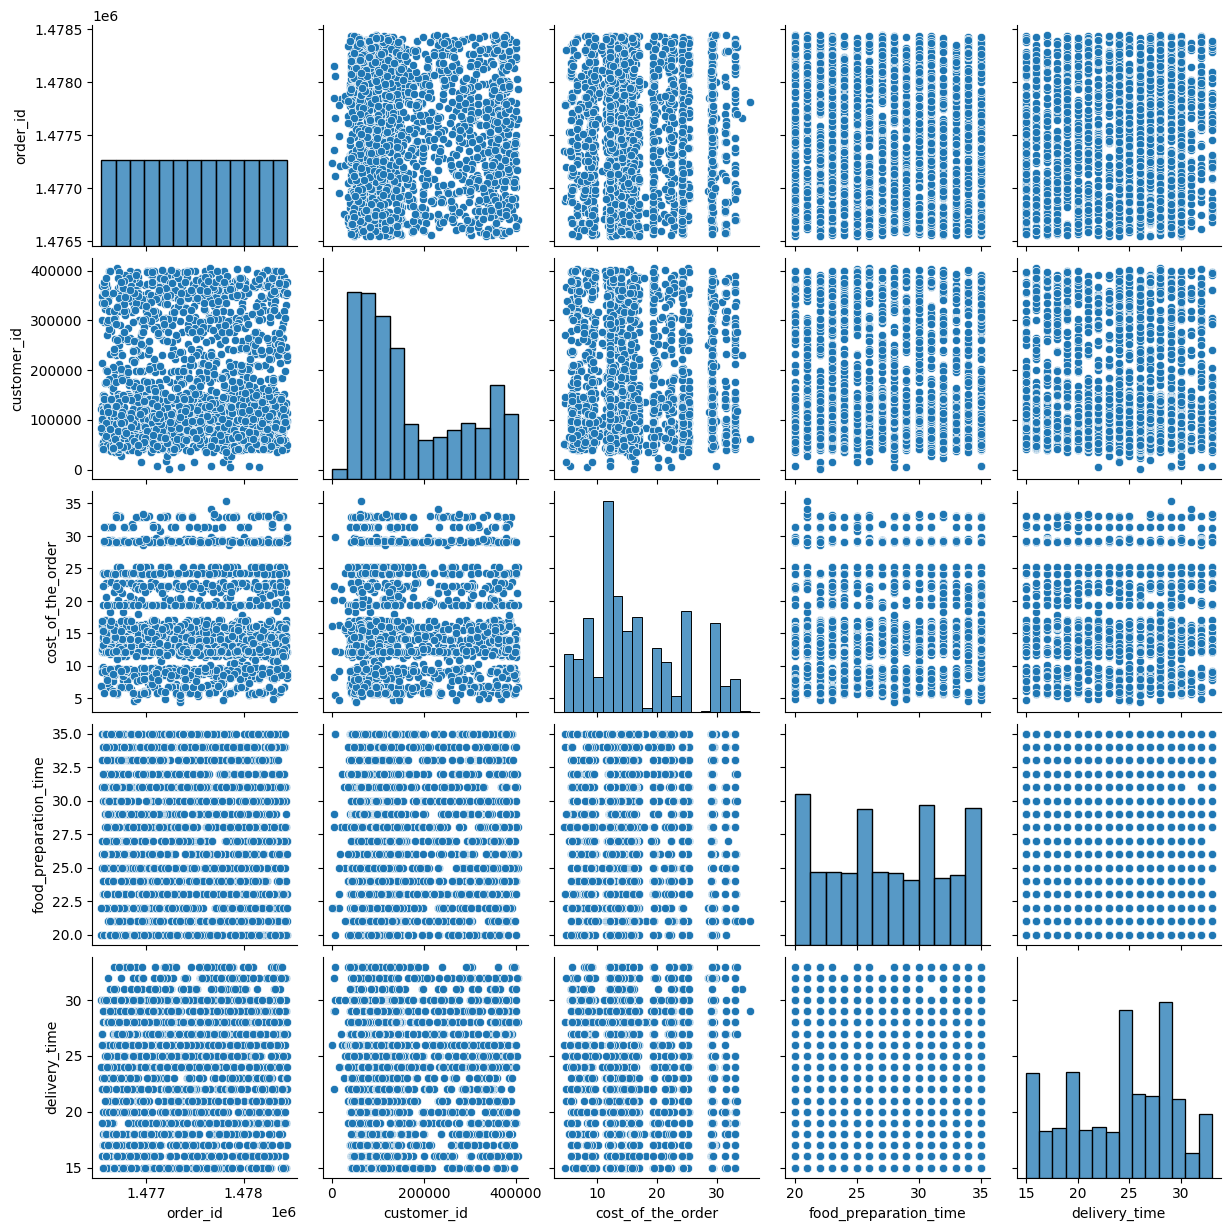

In [25]:
# I can also use a pair plot for multivariate visualization and analysis
sns.pairplot(df)
plt.show()

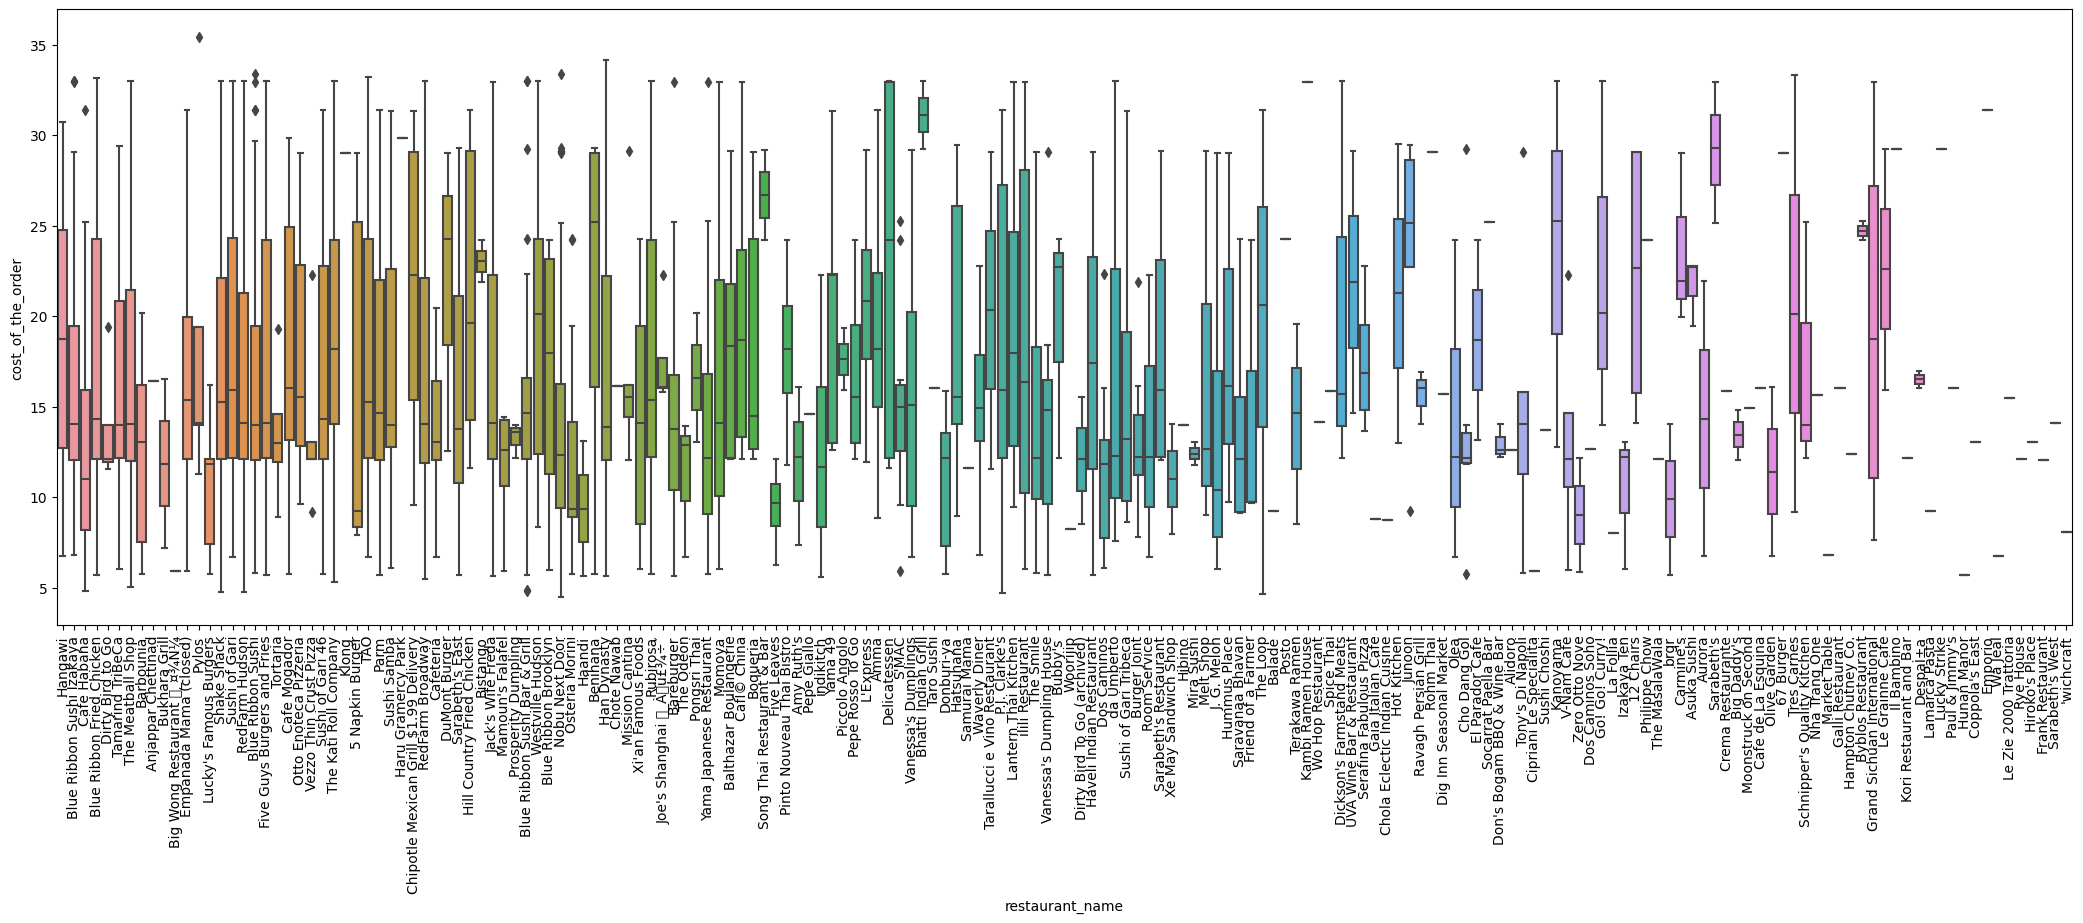

In [26]:
# I can use boxplots to analyze the relationships between numerical and categorical variables
# Boxplots showing relationship between the restaurant name and cost of the orders
plt.figure(figsize=(26,8))
sns.boxplot(x = 'restaurant_name', y = 'cost_of_the_order', data = df)
plt.xticks(rotation = 90)
plt.show()

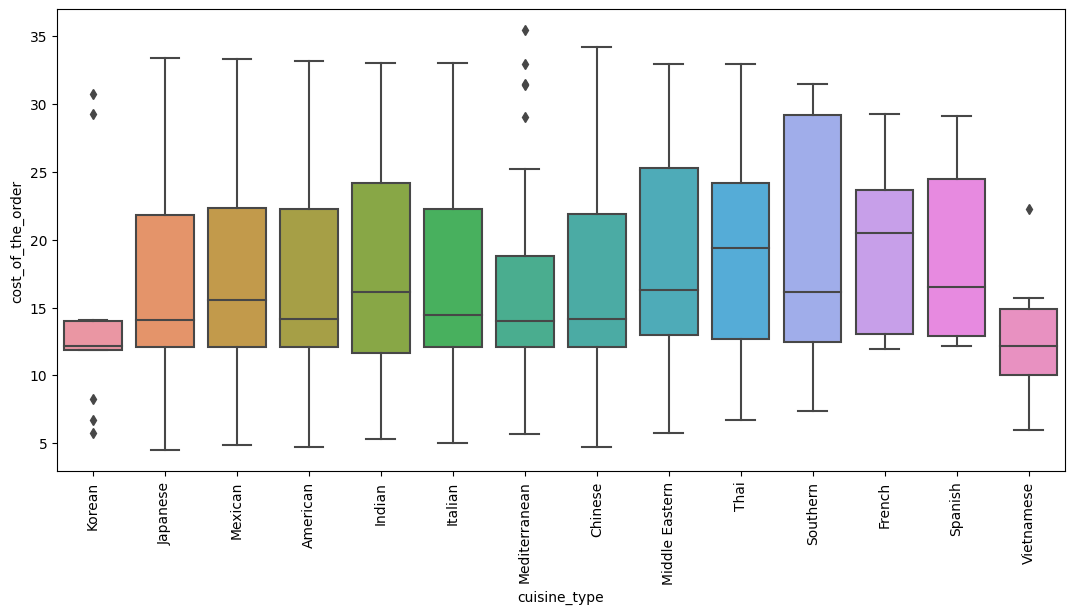

In [27]:
# Boxplots showing relationship between the cusine type and cost of the orders
plt.figure(figsize=(13,6))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df)
plt.xticks(rotation = 90)
plt.show()

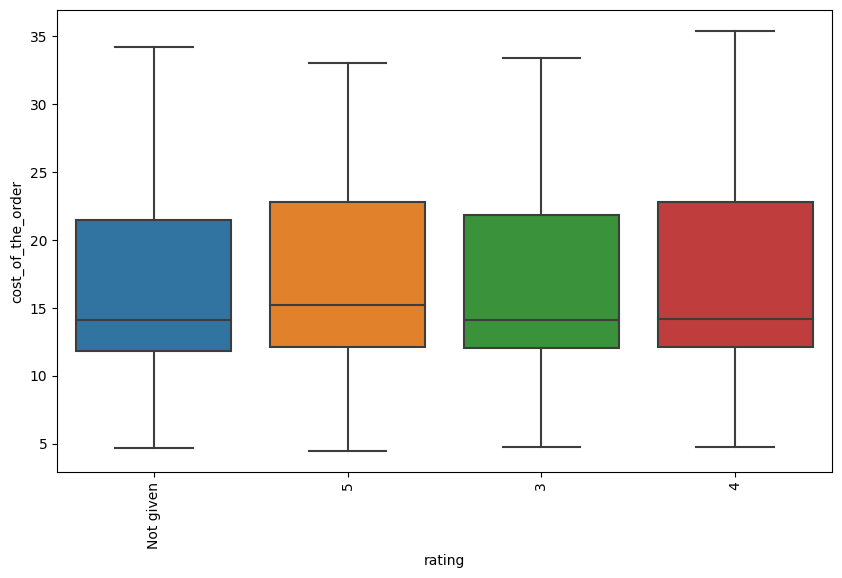

In [28]:
# Boxplots showing relationship between the rating and cost of the orders
plt.figure(figsize=(10,6))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.xticks(rotation = 90)
plt.show()

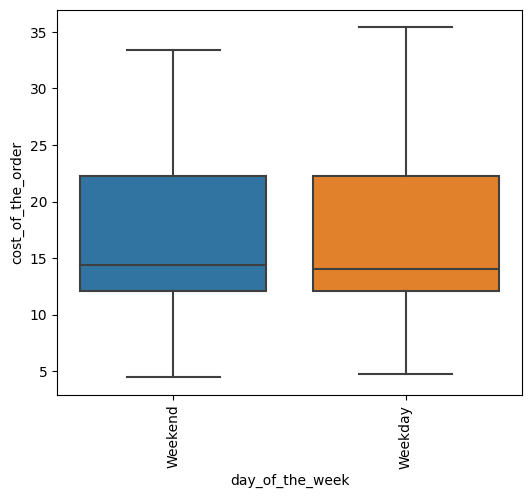

In [29]:
# Boxplots showing relationship between the day of the week and cost of the orders
plt.figure(figsize=(6,5))
sns.boxplot(x = 'day_of_the_week', y = 'cost_of_the_order', data = df)
plt.xticks(rotation = 90)
plt.show()

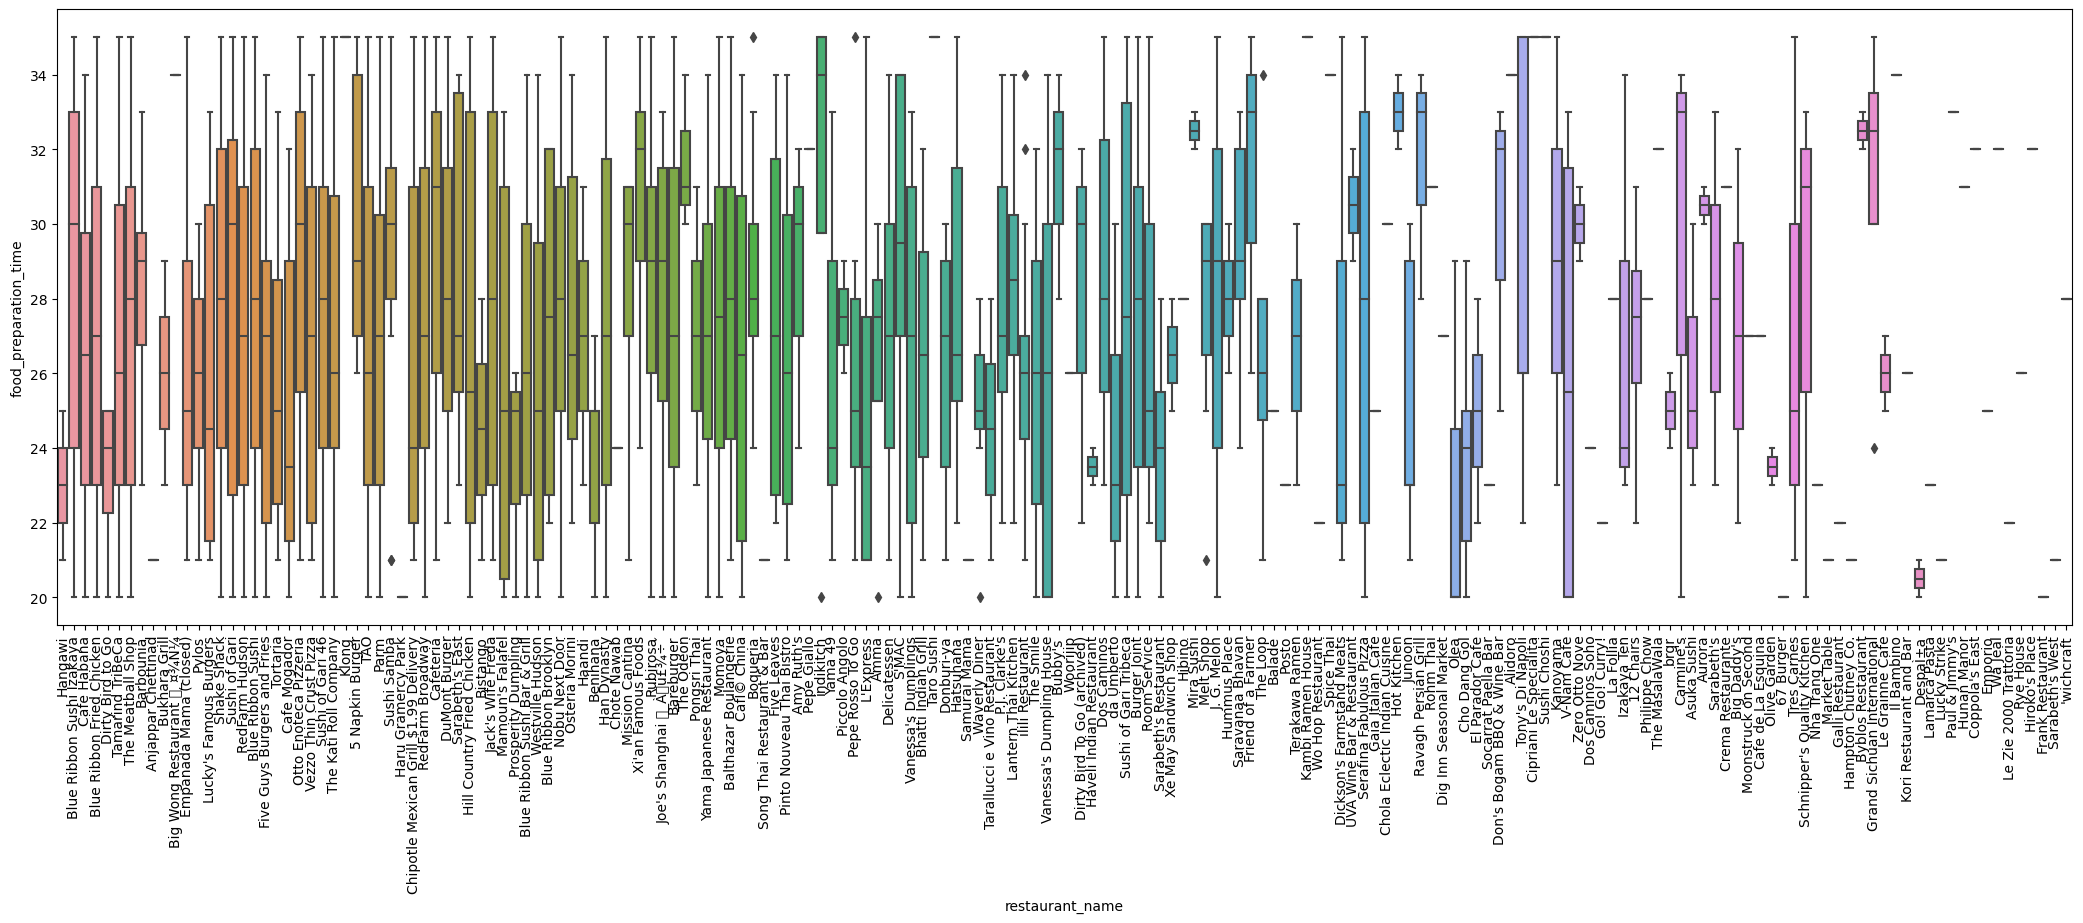

In [30]:
# Boxplots showing relationship between the restaurant name and food preparation time
plt.figure(figsize=(26,8))
sns.boxplot(x = 'restaurant_name', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 90)
plt.show()

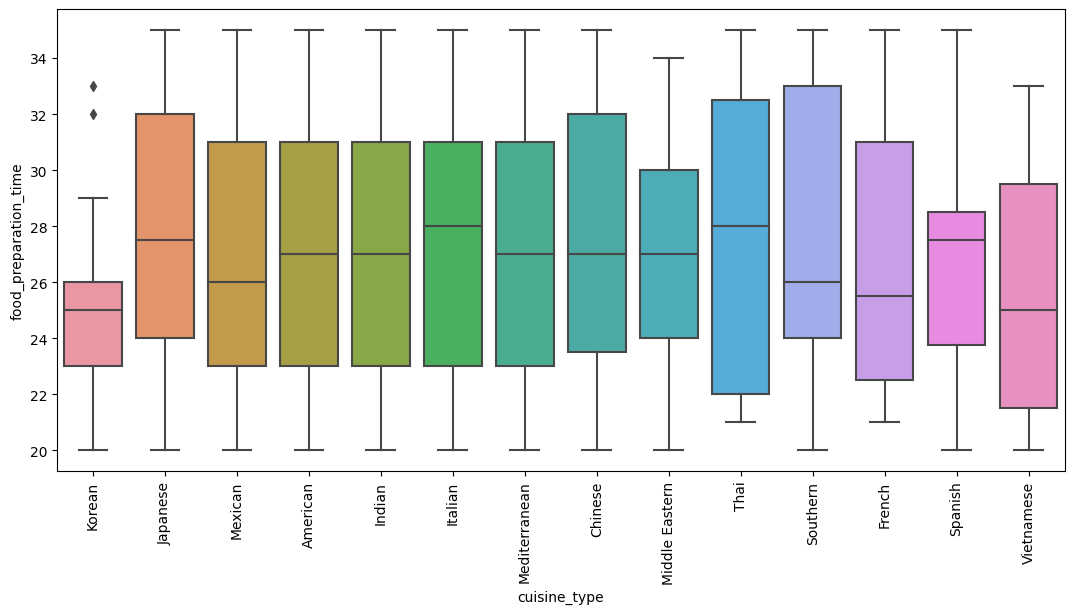

In [31]:
# Boxplots showing relationship between the cusine type and food preparation time
plt.figure(figsize=(13,6))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 90)
plt.show()

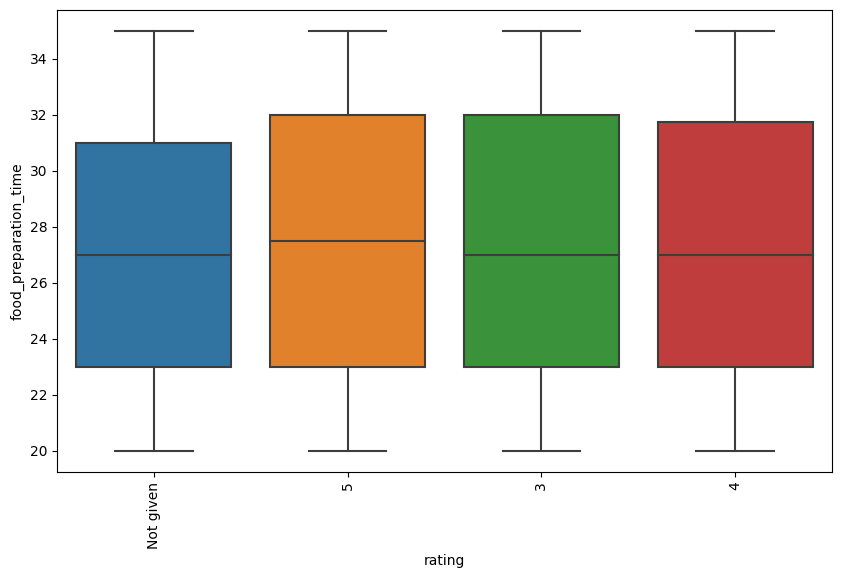

In [32]:
# Boxplots showing relationship between the rating and food preparation time
plt.figure(figsize=(10,6))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 90)
plt.show()

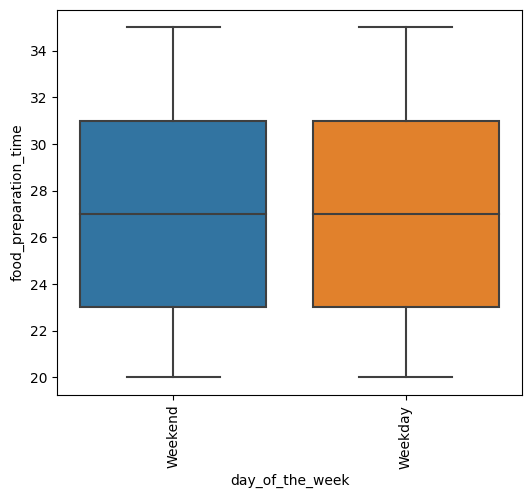

In [33]:
# Boxplots showing relationship between the day of the week and food preparation time
plt.figure(figsize=(6,5))
sns.boxplot(x = 'day_of_the_week', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 90)
plt.show()

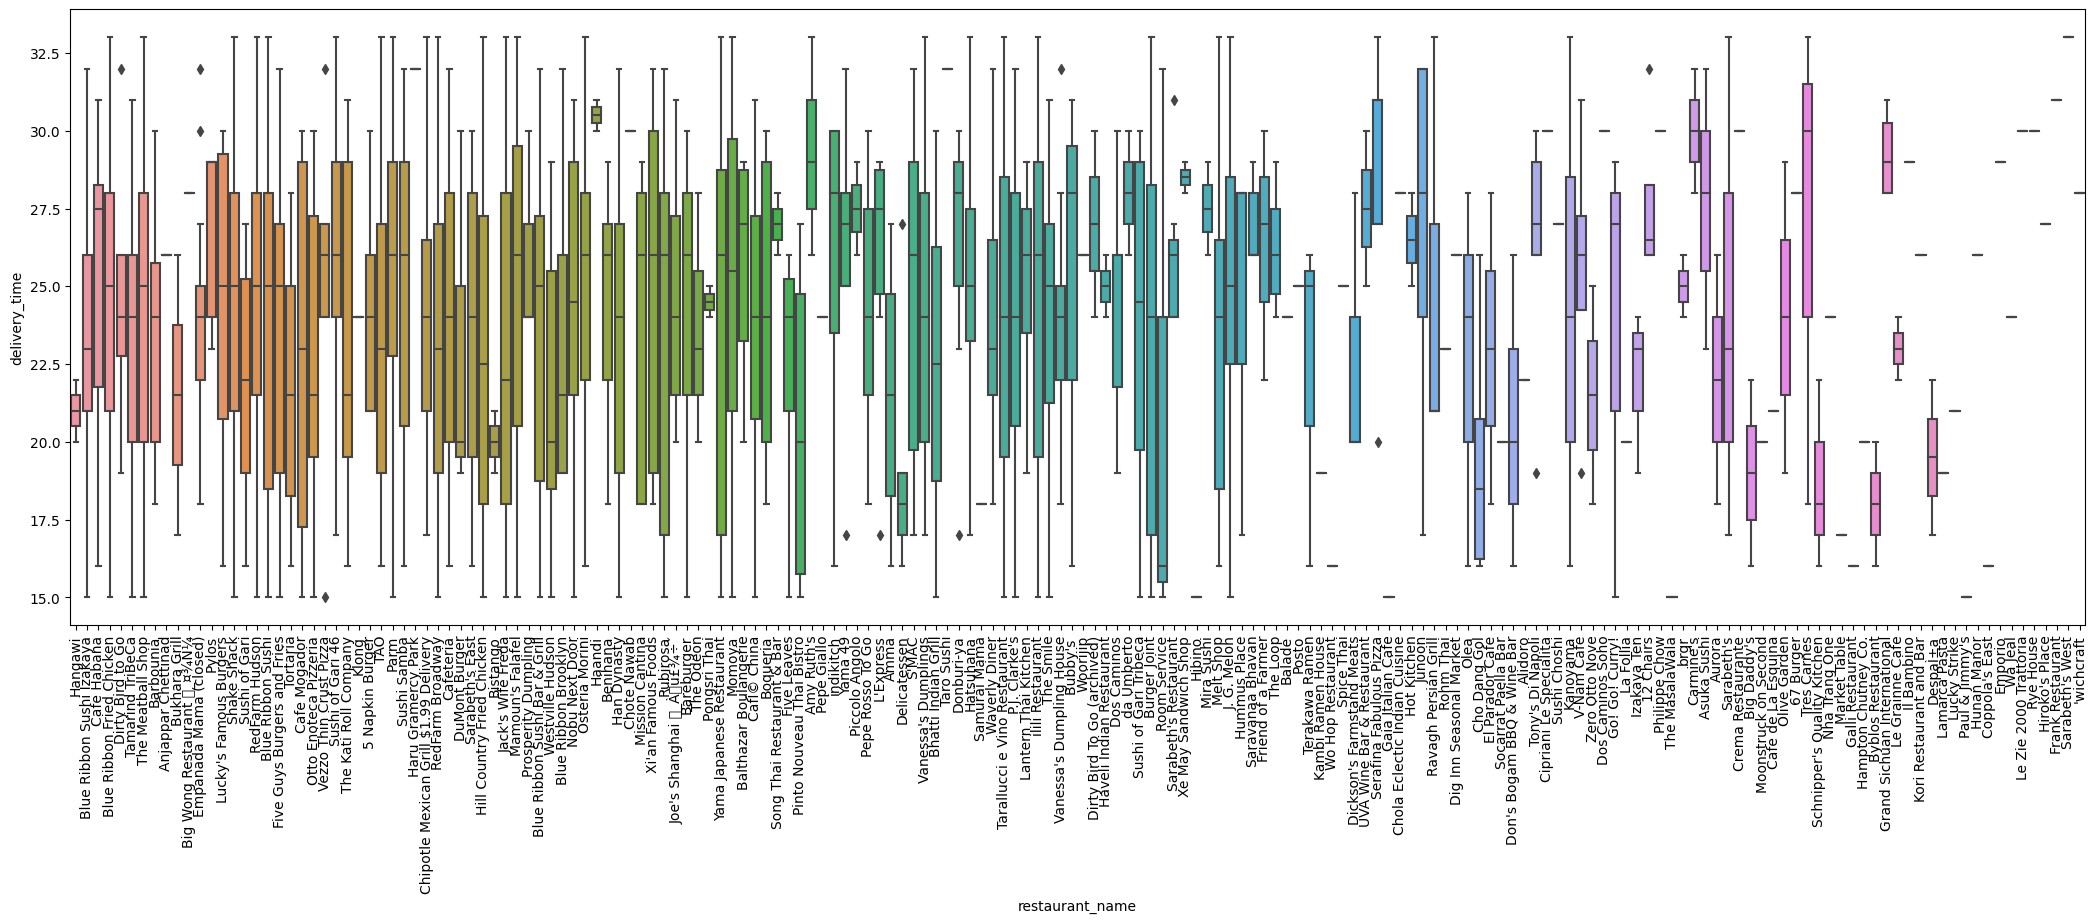

In [34]:
# Boxplots showing relationship between the restaurant name and delivery time
plt.figure(figsize=(26,8))
sns.boxplot(x = 'restaurant_name', y = 'delivery_time', data = df)
plt.xticks(rotation = 90)
plt.show()

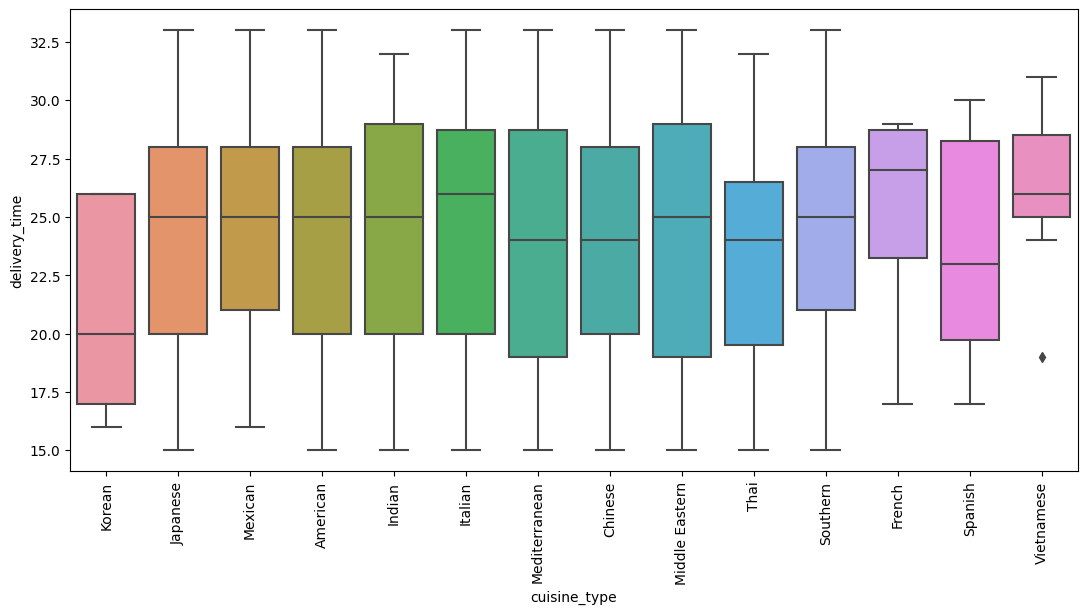

In [35]:
# Boxplots showing relationship between the cusine type and delivery time
plt.figure(figsize=(13,6))
sns.boxplot(x = 'cuisine_type', y = 'delivery_time', data = df)
plt.xticks(rotation = 90)
plt.show()

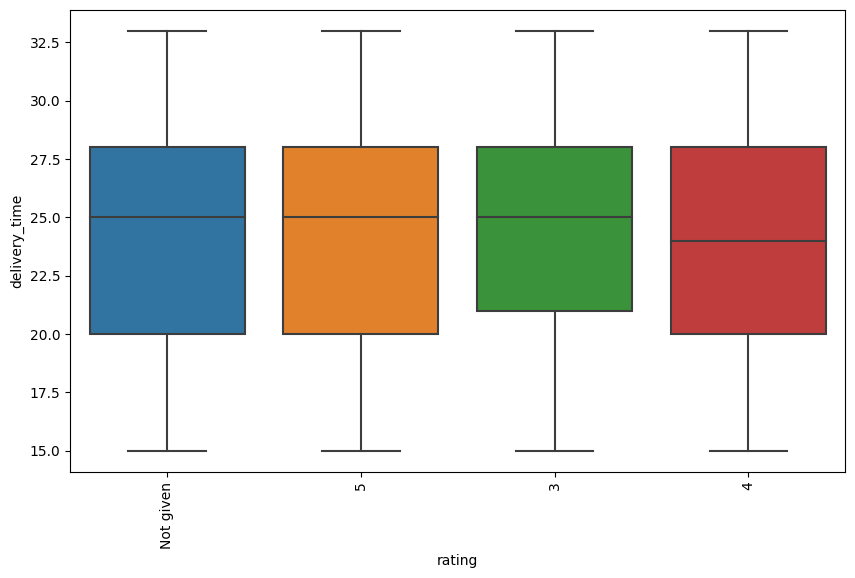

In [36]:
# Boxplots showing relationship between the rating and delivery time
plt.figure(figsize=(10,6))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df)
plt.xticks(rotation = 90)
plt.show()

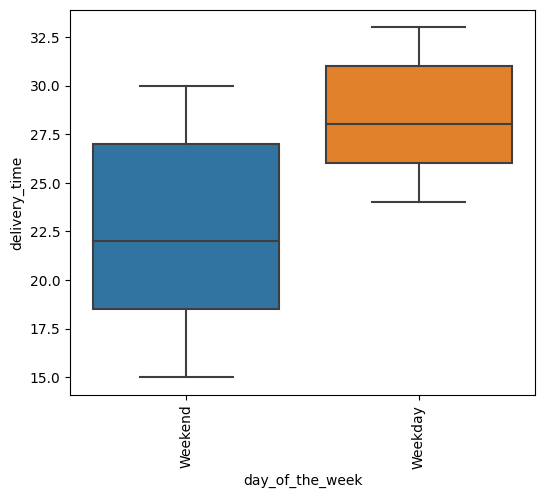

In [37]:
# Boxplots showing relationship between the day of the week and delivery time
plt.figure(figsize=(6,5))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df)
plt.xticks(rotation = 90)
plt.show()

#### Observations: The correlation matrix, heatmap, and pair plot output indicate that there are no significant correlations between the numerical variables. The box plots show that there is a lot of variation between the restaurants for cost of the orders, food preparation time, and delivery time. Some of the restaurants have outliers. For cuisine type, the boxplots show that Korean, Mediterranean, and Vietnamese have outliers for cost of orders. Korean has outliers for food preparation time, while Vietnamese has an outlier for delivery time. The boxplots for ratings show very little differences overall in cost of orders, food preparation time, and delivery time. The boxplots for day of the week show no significant difference for food preparation time, but the max value for cost of order is slightly higher for weekday and there is a noticeable difference between weekend and weekday for delivery time. The last plot shows that the median of weekday is above the median of weekend, implying that the delivery time tends to be greater on weekdays than weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [38]:
# Write the code here
# First, I have to replace the categorical values of 'rating' with numerical values
df3=df
df3['rating'].replace(['Not given','3','4','5'],[0,3,4,5],inplace=True)

In [39]:
# Now, I remove all rows where there are no ratings
df3 = df3[df3.rating != 0]

In [40]:
# Now I see how many restaurants have more than 50 ratings
df3['restaurant_name'].value_counts()

restaurant_name
Shake Shack                    133
The Meatball Shop               84
Blue Ribbon Sushi               73
Blue Ribbon Fried Chicken       64
RedFarm Broadway                41
                              ... 
Philippe Chow                    1
Dirty Bird To Go (archived)      1
The MasalaWala                   1
Kambi Ramen House                1
'wichcraft                       1
Name: count, Length: 156, dtype: int64

In [41]:
# Now I find the average rating for each restaurant
df3 = df3.groupby('restaurant_name').agg({'rating':'mean'})
print(df3.to_string())

                                         rating
restaurant_name                                
'wichcraft                             5.000000
12 Chairs                              4.500000
5 Napkin Burger                        4.000000
67 Burger                              5.000000
Amma                                   4.500000
Amy Ruth's                             4.000000
Anjappar Chettinad                     5.000000
Asuka Sushi                            5.000000
Balade                                 5.000000
Balthazar Boulangerie                  4.200000
Barbounia                              4.500000
Bareburger                             4.058824
Benihana                               4.500000
Bhatti Indian Grill                    5.000000
Big Daddy's                            5.000000
Blue Ribbon Brooklyn                   3.333333
Blue Ribbon Fried Chicken              4.328125
Blue Ribbon Sushi                      4.219178
Blue Ribbon Sushi Bar & Grill          4

#### Observations: According to the results shown above, the restaurants fulfilling the criteria for this offer are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [42]:
# Write the code here
# I can define a function to calculate the revenue
def revenue_function(i):
    # Orders having cost greater than $20
    if i > 20:
        return i*0.25
    # Orders having cost greater than $5
    elif i > 5:
        return i*0.15
    # All other orders
    else:
        return i*0
# Net revenue generated across all orders
df['revenue'] = df['cost_of_the_order'].apply(revenue_function)
df['revenue'].sum()

6166.303

#### Observations: The net revenue across all orders is $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [43]:
# Write the code here
# First, I create a column for the total time and determine how many orders took more than 60 minutes
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
above_60_min = df[df['total_time']>60]
above_60_min.shape

(200, 11)

In [44]:
# Now I can calculate the percentage
(200/1898)*100

10.537407797681771

#### Observations: 10.54% of the orders took more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [45]:
# Write the code here
# I can use groupby to find the mean delivery time for weekdays and weekends
df = df.groupby('day_of_the_week').agg({'delivery_time':'mean'})
print(df.to_string())

                 delivery_time
day_of_the_week               
Weekday              28.340037
Weekend              22.470022


#### Observations: The mean delivery time for weekdays is 28.34 minutes and the mean delivery time for weekends is 22.47 minutes. On average, it takes longer to deliver food orders on weekdays than on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions: 
* American is the most popular cuisine type, followed by Japanese, then Italian, then Chinese. 
* The restaurant Shake Shack has the most orders, followed by The Meatball Shop, then Blue Ribbon Sushi. These three top restaurants also qualify for the promotional offer.
* The customers with ID numbers 52832, 47440, and 83287 are the top 3 most frequent customers who qualify for the 20% discount vouchers.
* Overall, there are more orders on weekends.
* Overall, the delivery time is less on weekends than weekdays.
* A large portion of the customers do not leave a rating.

### Recommendations:

* You can offer discounts to customers who leave ratings to encourage more customers to provide feedback.
* You can offer discounts on weekends to invite more customers to use FoodHub for making orders.
* You can offer discounts to the most frequent customers such as #52832, to encourage them to continue using FoodHub more frequently.
* You can offer discounts on the most popular cuisine types such as American to invite more customers to use FoodHub for making orders.
* Focus on the top restaurants such as Shake Shake to maximize your profit.

---